# Coffee Roasting

In [1]:
#Import major libraries required for this task
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
#Import important dataset
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit

In [3]:
#Lets load the features and labels in a particular variables
X,Y=load_coffee_data()

In [4]:
#Lets just see the two datasets just recieved

In [5]:
X

array([[185.32,  12.69],
       [259.92,  11.87],
       [231.01,  14.41],
       [175.37,  11.72],
       [187.12,  14.13],
       [225.91,  12.1 ],
       [208.41,  14.18],
       [207.08,  14.03],
       [280.6 ,  14.23],
       [202.87,  12.25],
       [196.7 ,  13.54],
       [270.31,  14.6 ],
       [192.95,  15.2 ],
       [213.57,  14.28],
       [164.47,  11.92],
       [177.26,  15.04],
       [241.77,  14.9 ],
       [237.  ,  13.13],
       [219.74,  13.87],
       [266.39,  13.25],
       [270.45,  13.95],
       [261.96,  13.49],
       [243.49,  12.86],
       [220.58,  12.36],
       [163.59,  11.65],
       [244.76,  13.33],
       [271.19,  14.84],
       [201.99,  15.39],
       [229.93,  14.56],
       [204.97,  12.28],
       [173.19,  12.22],
       [231.51,  11.95],
       [152.69,  14.83],
       [163.42,  13.3 ],
       [215.95,  13.98],
       [218.04,  15.25],
       [251.3 ,  13.8 ],
       [233.33,  13.53],
       [280.24,  12.41],
       [243.02,  13.72],


In [6]:
Y

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [7]:
#The shapes of the two datasets are as follows.
print('Shape of feature dataset is ',X.shape)
print('Shape of label dataset is ',Y.shape)

Shape of feature dataset is  (200, 2)
Shape of label dataset is  (200, 1)


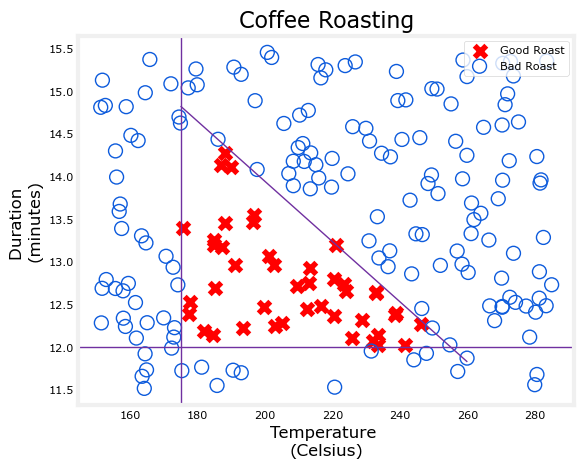

In [8]:
#Let just see the plot of our dataset.
plt_roast(X,Y)

In [9]:
#Not above the 3 boundaries drawn that differentiate the good roasted coffee beans from the bad ones.

In [10]:
#Now one of the most standard things that we have always done is normalisation. It can be done manually or via the help of 
#functions.
#But for neural networks we use a special layer for the normalisation purpose. The layer is coded as follows.
normalisation_Layer=tf.keras.layers.Normalization(axis=-1)
#Note axis -1 refers to the fact that each row of the matrix should be normalised one by one and independently.
normalisation_Layer.adapt(X)
#The above command finds the mean and variance. Stores the value internally and then normalises 
X_normal=normalisation_Layer(X)
#Just storing the normalised features.

In [11]:
#Now lets define our model that will do all the compution.
model=Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(units=3,activation='sigmoid',name='layer1'),
    Dense(units=1,activation='sigmoid',name='layer2')
])

#Now there is something extra here. Its the first line of the code. The tf.keras.Input(shape=(2,)), specifies the expected 
#shape of the input. This allows Tensorflow to size the weights and bias parameters at this point. This is useful when exploring
#Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input 
#data is specified in the model.fit statement.

In [12]:
#Now lets see the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
#Lets see the weights associated to the model which it has instantiated.#These are all random values. No data has been fed into
#Model
#Weights for layer 1
W1, b1 = model.get_layer("layer1").get_weights()
#Weight for layer 2
W2, b2 = model.get_layer("layer2").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.33  0.98 -0.33]
 [ 0.49  0.18  0.66]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.44]
 [-0.62]
 [ 1.02]] 
b2(1,): [0.]


In [14]:
#The general pattern for storage is
#[
#[w1 for neuron1,w1 for neuron 2 and so on]
#[w2 for neuron1,w2 for neuron 2 and so on]
#]
#We can already understand how b is being stored for each neuron

In [15]:
#Lets find the loss and cost for current weights and baises.
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=BinaryCrossentropy(),optimizer=Adam(learning_rate=0.01))
model.fit(X_normal,Y,epochs=1000)

Epoch 1/1000
7/7 [==============================] - 1s 4ms/step - loss: 0.6690
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6167
Epoch 3/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.5754
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5423
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5183
Epoch 6/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.5038
Epoch 7/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4924
Epoch 8/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4837
Epoch 9/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4786
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4740
Epoch 11/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4701
Epoch 12/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4666
Epoch 13/1000
7/7 [==============================

7/7 [==============================] - 0s 3ms/step - loss: 0.3035
Epoch 104/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3020
Epoch 105/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3003
Epoch 106/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2986
Epoch 107/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.2968
Epoch 108/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2950
Epoch 109/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.2934
Epoch 110/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2917
Epoch 111/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.2900
Epoch 112/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.2882
Epoch 113/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 114/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.2847
Epoch 115/1000
7/7 [=======================

7/7 [==============================] - 0s 4ms/step - loss: 0.1879
Epoch 205/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1872
Epoch 206/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1867
Epoch 207/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1863
Epoch 208/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1857
Epoch 209/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1856
Epoch 210/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1851
Epoch 211/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1851
Epoch 212/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1841
Epoch 213/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1837
Epoch 214/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1833
Epoch 215/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1828
Epoch 216/1000
7/7 [=======================

7/7 [==============================] - 0s 2ms/step - loss: 0.1582
Epoch 306/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1587
Epoch 307/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1585
Epoch 308/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1581
Epoch 309/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 310/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 311/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1574
Epoch 312/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1574
Epoch 313/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1573
Epoch 314/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1571
Epoch 315/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1570
Epoch 316/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1567
Epoch 317/1000
7/7 [=======================

7/7 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 407/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1472
Epoch 408/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1470
Epoch 409/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1467
Epoch 410/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1469
Epoch 411/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1465
Epoch 412/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1467
Epoch 413/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1466
Epoch 414/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1464
Epoch 415/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1464
Epoch 416/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1465
Epoch 417/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1463
Epoch 418/1000
7/7 [=======================

7/7 [==============================] - 0s 3ms/step - loss: 0.1411
Epoch 508/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1409
Epoch 509/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1408
Epoch 510/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1407
Epoch 511/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1406
Epoch 512/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1410
Epoch 513/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1414
Epoch 514/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1418
Epoch 515/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1414
Epoch 516/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1417
Epoch 517/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1417
Epoch 518/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1410
Epoch 519/1000
7/7 [=======================

7/7 [==============================] - 0s 3ms/step - loss: 0.1371
Epoch 609/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1366
Epoch 610/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1368
Epoch 611/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1366
Epoch 612/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 613/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1366
Epoch 614/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1364
Epoch 615/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1366
Epoch 616/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1363
Epoch 617/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1362
Epoch 618/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1362
Epoch 619/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1361
Epoch 620/1000
7/7 [=======================

7/7 [==============================] - 0s 4ms/step - loss: 0.1334
Epoch 710/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 711/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1340
Epoch 712/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1338
Epoch 713/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1329
Epoch 714/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1329
Epoch 715/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1333
Epoch 716/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1334
Epoch 717/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1334
Epoch 718/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1334
Epoch 719/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1329
Epoch 720/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1338
Epoch 721/1000
7/7 [=======================

7/7 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 811/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1310
Epoch 812/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1307
Epoch 813/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1309
Epoch 814/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 815/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1308
Epoch 816/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1308
Epoch 817/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1310
Epoch 818/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1310
Epoch 819/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1309
Epoch 820/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1314
Epoch 821/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1310
Epoch 822/1000
7/7 [=======================

7/7 [==============================] - 0s 3ms/step - loss: 0.1289
Epoch 912/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1286
Epoch 913/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1287
Epoch 914/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1289
Epoch 915/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1287
Epoch 916/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1286
Epoch 917/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1283
Epoch 918/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1281
Epoch 919/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1285
Epoch 920/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1282
Epoch 921/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1292
Epoch 922/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1282
Epoch 923/1000
7/7 [=======================

In [16]:
#Now that the model is trained. Lets see the new weights and baises obtained.
W1_new,B1_new=model.get_layer("layer1").get_weights()
W2_new,B2_new=model.get_layer("layer2").get_weights()

print(f"W1{W1_new.shape}:\n", W1_new, f"\nb1{B1_new.shape}:", B1_new)
print(f"W2{W2_new.shape}:\n", W2_new, f"\nb2{B2_new.shape}:", B2_new)

W1(2, 3):
 [[6.79 7.52 5.99]
 [7.26 1.62 1.28]] 
b1(3,): [-1.16 -3.13  7.08]
W2(3, 1):
 [[-11.  ]
 [ -7.42]
 [  8.08]] 
b2(1,): [-4.85]


In [17]:
#Now that our neural network is trained lets perform predictions using it.
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = normalisation_Layer(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 175ms/step
predictions = 
 [[6.92e-01]
 [1.11e-04]]


In [18]:
#Lets put it through a decision boundary
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


Let just visualise the decision boundaries deployed

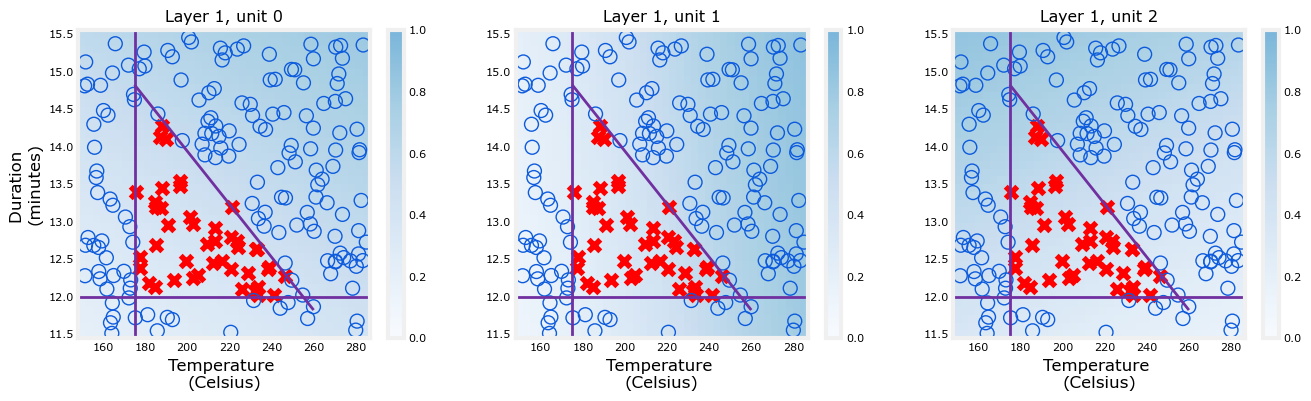

In [19]:
#Let's examine the functions of the units to determine their role in the coffee roasting decision. We will plot the output of each node for all values of the inputs (duration,temp). Each unit is a logistic function whose output can range from zero to one. The shading in the graph represents the output value.
#> Note: In labs we typically number things starting at zero while the lectures may start with 1.

plt_layer(X,Y.reshape(-1,),W1,b1,normalisation_Layer)


